**# Proyecto: Análisis del mercado de cafeterías en la Ciudad de Buenos Aires**

**Abstract**

El presente proyecto analiza la distribución territorial y el perfil estilístico de las cafeterías registradas en la Ciudad de Buenos Aires, con el objetivo de identificar patrones de concentración y segmentación dentro del mercado gastronómico.

**Motivación**

El mercado de cafeterías presenta una alta competencia y una fuerte relación con variables territoriales y de perfil de consumo. Comprender cómo se distribuyen y qué estilos predominan permite detectar oportunidades estratégicas para inversión o expansión.

**Audiencia**


*   Inversores gastronómicos
*   Dueños de cafeterías
*   Consultores de mercado
*   Analistas urbanos

# Preguntas de investigación

1.   ¿Cómo se distribuyen territorialmente las cafeterías en la Ciudad de Buenos Aires?
2.   ¿Existe una concentración significativa de la oferta en determinados barrios o comunas?
3.   ¿Qué estilos de ambientación predominan en el mercado de cafeterías?
4.   ¿Existen diferencias en el perfil estilístico según la zona de la ciudad?


**# Hipótesis de trabajo**

**Hipótesis 1:**
La concentración de cafeterías se asocia con zonas de alta actividad económica y flujo comercial.

**Hipótesis 2:**
La oferta de cafeterías se concentra en dos perfiles dominantes — clásico porteño y moderno — evidenciando una segmentación clara del mercado.

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/RomanCriscione/ProyectoDataScience2/main/data/oferta_gastronomica.csv"

df = pd.read_csv(url, encoding="latin1", sep=";")

df.shape

(2823, 18)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   long                     2823 non-null   object 
 1   lat                      2823 non-null   object 
 2   id                       2823 non-null   int64  
 3   nombre                   2823 non-null   object 
 4   categoria                2707 non-null   object 
 5   cocina                   2464 non-null   object 
 6   ambientacion             2264 non-null   object 
 7   telefono                 2303 non-null   object 
 8   mail                     472 non-null    object 
 9   horario                  725 non-null    object 
 10  calle_nombre             2823 non-null   object 
 11  calle_altura             2823 non-null   int64  
 12  calle_cruce              6 non-null      object 
 13  direccion_completa       2822 non-null   object 
 14  barrio                  

## Resumen de los datos

El dataset original contiene 2823 registros y 18 variables, incluyendo información geográfica (latitud, longitud, barrio, comuna), categorización del establecimiento y características de ambientación.

In [4]:
df.columns

Index(['long', 'lat', 'id', 'nombre', 'categoria', 'cocina', 'ambientacion',
       'telefono', 'mail', 'horario', 'calle_nombre', 'calle_altura',
       'calle_cruce', 'direccion_completa', 'barrio', 'comuna',
       'codigo_postal', 'codigo_postal_argentino'],
      dtype='object')

In [5]:
df['categoria'].value_counts()

,count
categoria,
RESTAURANTE,1990
CAFE,334
BAR,247
CONFITERIA,55
PUB,53
VINERIA,22
SANDWICHERIA,4
DELIVERY & TAKE AWAY,2


In [6]:
cafeterias = df[df['categoria'].isin(['CAFE', 'CONFITERIA'])]

cafeterias.shape

(389, 18)

# Análisis Exploratorio de Datos (EDA)

In [7]:
cafeterias['barrio'].value_counts().head(10)

,count
barrio,
Recoleta,69
San Nicolas,64
Balvanera,50
Monserrat,29
Palermo,26
Caballito,25
Flores,18
Retiro,15
Saavedra,11


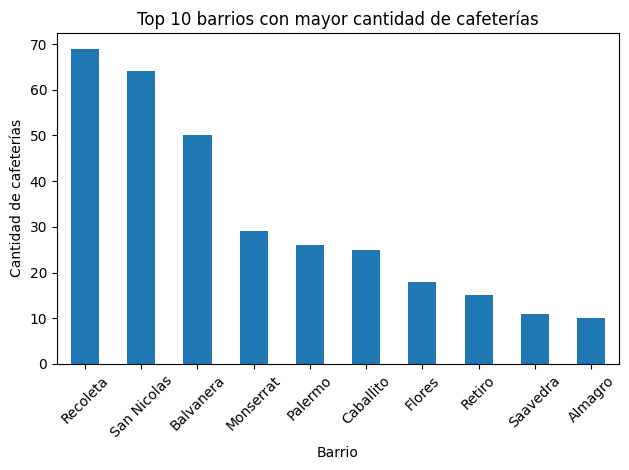

In [8]:
import matplotlib.pyplot as plt

top_barrios = cafeterias['barrio'].value_counts().head(10)

plt.figure()
top_barrios.plot(kind='bar')
plt.title("Top 10 barrios con mayor cantidad de cafeterías")
plt.xlabel("Barrio")
plt.ylabel("Cantidad de cafeterías")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hipótesis 1

**La concentración de cafeterías se asocia con zonas de alta actividad económica y poder adquisitivo.**

*Del análisis de distribución territorial se observa que los barrios de Recoleta, San Nicolás y Balvanera concentran la mayor cantidad de cafeterías. Esto sugiere que la oferta de cafeterías se ve influenciada por zonas con alta densidad de actividad comercial y económica, así como por barrios con mayor afluencia peatonal y poder adquisitivo.*

In [14]:
# Tabla con porcentaje del total

tabla_barrios = cafeterias['barrio'].value_counts().reset_index()
tabla_barrios.columns = ['barrio', 'cantidad']

tabla_barrios['porcentaje'] = (
    tabla_barrios['cantidad'] / tabla_barrios['cantidad'].sum()
) * 100

tabla_barrios.head(10)


,barrio,cantidad,porcentaje
0,Recoleta,69,17.737789
1,San Nicolas,64,16.452442
2,Balvanera,50,12.853470
3,Monserrat,29,7.455013
4,Palermo,26,6.683805
5,Caballito,25,6.426735
6,Flores,18,4.627249
7,Retiro,15,3.856041
8,Saavedra,11,2.827763
9,Almagro,10,2.570694


In [15]:
tabla_barrios.head(3)['porcentaje'].sum()

np.float64(47.043701799485866)

In [16]:
cafeterias['comuna'].value_counts()

,count
comuna,
1,120
2,69
3,50
14,26
6,25
4,18
7,18
12,13
10,11


In [17]:
tabla_comunas = cafeterias['comuna'].value_counts().reset_index()
tabla_comunas.columns = ['comuna', 'cantidad']

tabla_comunas['porcentaje'] = (
    tabla_comunas['cantidad'] / tabla_comunas['cantidad'].sum()
) * 100

tabla_comunas

,comuna,cantidad,porcentaje
0,1,120,30.848329
1,2,69,17.737789
2,3,50,12.853470
3,14,26,6.683805
4,6,25,6.426735
5,4,18,4.627249
6,7,18,4.627249
7,12,13,3.341902
8,10,11,2.827763
9,5,10,2.570694


<Figure size 640x480 with 0 Axes>

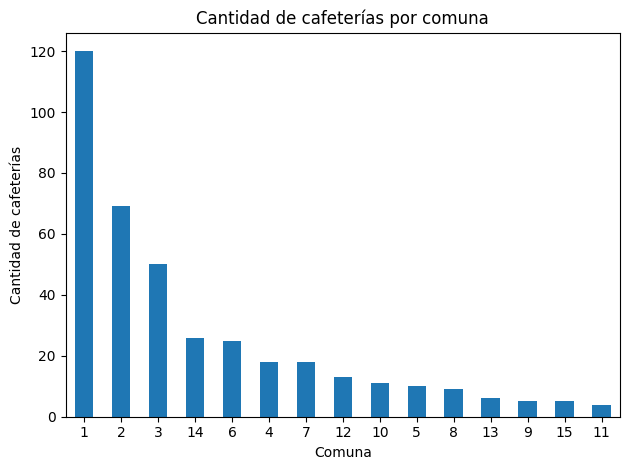

In [18]:
import matplotlib.pyplot as plt

plt.figure()
tabla_comunas.sort_values('cantidad', ascending=False).plot(
    x='comuna',
    y='cantidad',
    kind='bar',
    legend=False
)

plt.title("Cantidad de cafeterías por comuna")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de cafeterías")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
cafeterias['ambientacion'].value_counts()

,count
ambientacion,
CLASICO PORTEÑO,150
MODERNO,133
ANTIGUO,12
RUSTICA,5
ELEGANTE,4
AMERICANO,3
BRITANICA,2
CAMPESTRE,2
ITALIANA,1


In [20]:
top_ambientacion = cafeterias['ambientacion'].value_counts().reset_index()
top_ambientacion.columns = ['ambientacion', 'cantidad']

top_ambientacion['porcentaje'] = (
    top_ambientacion['cantidad'] / top_ambientacion['cantidad'].sum()
) * 100

top_ambientacion.head(2)

,ambientacion,cantidad,porcentaje
0,CLASICO PORTEÑO,150,46.153846
1,MODERNO,133,40.923077


<Figure size 640x480 with 0 Axes>

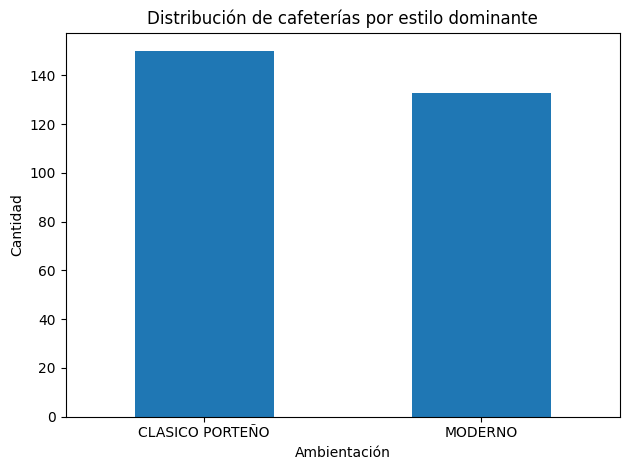

In [21]:
import matplotlib.pyplot as plt

top2 = top_ambientacion.head(2)

plt.figure()
top2.plot(
    x='ambientacion',
    y='cantidad',
    kind='bar',
    legend=False
)

plt.title("Distribución de cafeterías por estilo dominante")
plt.xlabel("Ambientación")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **Hipótesis 2**

**La oferta de cafeterías en la Ciudad de Buenos Aires se concentra en dos perfiles dominantes — clásico porteño y moderno — evidenciando una fuerte polarización entre tradición e innovación en el mercado.**

*La distribución de ambientación muestra que el 46,15% de las cafeterías presentan un estilo clásico porteño, mientras que el 40,92% se identifican como modernas. En conjunto, ambos estilos representan aproximadamente el 87% del total analizado, lo que indica una clara concentración del mercado en dos propuestas dominantes y una participación marginal de estilos alternativos o temáticos.*

In [22]:
pd.crosstab(cafeterias['comuna'], cafeterias['ambientacion'])

ambientacion,AMERICANO,ANTIGUO,ARMENIA,BODEGA,BRASILERA,BRITANICA,CAMPESTRE,CHINA,CLASICO PORTEÑO,COLONIAL,...,ESPAÑOL,FARMACIA,FOLKLORICO,FRANCES,GRIEGA,ITALIANA,LITERARIO,MODERNO,RUSTICA,TANGO
comuna,,,,,,,,,,,,,,,,,,,,,
1,1,3,0,0,0,0,0,0,51,1,...,1,0,1,0,1,0,0,42,1,0
2,0,0,0,0,0,0,0,0,30,0,...,0,0,0,0,0,0,0,29,1,0
3,0,1,0,0,0,0,0,0,19,0,...,0,0,0,0,0,0,1,14,0,0
4,0,2,0,0,0,2,0,0,9,0,...,0,0,0,0,0,0,0,3,0,1
5,0,0,0,0,0,0,0,1,4,0,...,0,0,0,0,0,0,0,2,0,0
6,0,3,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,7,1,0
7,0,1,0,0,0,0,0,0,5,0,...,0,1,0,0,0,0,0,6,0,0
8,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,5,0,0
9,0,0,0,1,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
cruce_top2 = pd.crosstab(
    cafeterias['comuna'],
    cafeterias['ambientacion']
)[['CLASICO PORTEÑO', 'MODERNO']]

cruce_top2

ambientacion,CLASICO PORTEÑO,MODERNO
comuna,,
1,51,42
2,30,29
3,19,14
4,9,3
5,4,2
6,8,7
7,5,6
8,3,5
9,3,1


In [24]:
cruce_prop = cruce_top2.div(cruce_top2.sum(axis=1), axis=0)

cruce_prop

ambientacion,CLASICO PORTEÑO,MODERNO
comuna,,
1,0.548387,0.451613
2,0.508475,0.491525
3,0.575758,0.424242
4,0.750000,0.250000
5,0.666667,0.333333
6,0.533333,0.466667
7,0.454545,0.545455
8,0.375000,0.625000
9,0.750000,0.250000


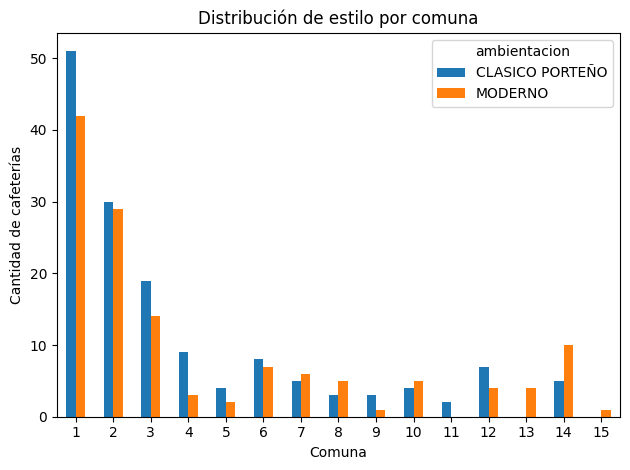

In [26]:
import matplotlib.pyplot as plt

cruce_top2.plot(kind='bar')

plt.title("Distribución de estilo por comuna")
plt.xlabel("Comuna")
plt.ylabel("Cantidad de cafeterías")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Análisis cruzado: Estilo vs Territorio

La comparación proporcional entre estilo y comuna revela que en las comunas centrales (1, 2 y 3) existe un equilibrio relativo entre cafeterías de estilo clásico porteño y moderno.

Sin embargo, en comunas como la 14 se observa una mayor presencia proporcional de cafeterías modernas (66,6%), mientras que en comunas como la 4 y 9 predomina el estilo clásico.

Este patrón sugiere que el perfil del mercado no solo está territorialmente concentrado, sino que también presenta segmentación estilística según la zona de la ciudad.

# Insights Finales



1.   Alta concentración territorial (47%)
2.   Predominio Comuna 1 (30,8%)
3.   Polarización 87% clásico/moderno
4.   Segmentación territorial por perfil



Estos hallazgos permiten identificar oportunidades estratégicas de diferenciación y localización para nuevos emprendimientos gastronómicos dentro de la ciudad.